In [2]:
import numpy as np
import pandas as pd

# Step 1: Load the Auto MPG dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')

# Step 2: Data Preprocessing
# Drop rows with missing horsepower values
data = data.dropna(subset=['horsepower'])

# Drop 'car_name' as it's not a numerical feature
data = data.drop(columns=['car_name'])

# Convert 'horsepower' to numeric (it's loaded as string due to '?')
data['horsepower'] = pd.to_numeric(data['horsepower'])

# Separate the target variable (mpg) and features
X = data.drop(columns=['mpg'])
y = data['mpg'].values

# Step 3: Normalize the Features
# Normalize the features to ensure all have a mean of 0 and standard deviation of 1
X = (X - X.mean()) / X.std()

# Add a bias term (column of ones) for the intercept
X = np.c_[np.ones(X.shape[0]), X]

# Step 4: Train-Test Split (80% train, 20% test)
def train_test_split(X, y, test_size=0.2):
    n = X.shape[0]
    split_index = int(n * (1 - test_size))
    return X[:split_index], X[split_index:], y[:split_index], y[split_index:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 5: Define Linear Regression with Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iter=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.tolerance = tolerance
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        rss_history = []

        for iteration in range(self.n_iter):
            # Prediction
            y_pred = X @ self.theta
            # Error
            error = y_pred - y
            # Compute the gradient
            gradient = (1 / m) * (X.T @ error)
            # Update weights
            self.theta -= self.learning_rate * gradient

            # Compute RSS (Residual Sum of Squares)
            rss = (1 / m) * np.sum(error ** 2)
            rss_history.append(rss)

            # Check for convergence (stopping criteria)
            if iteration > 0 and abs(rss_history[-2] - rss_history[-1]) < self.tolerance:
                print(f"Converged after {iteration} iterations.")
                break

        return rss_history

    def predict(self, X):
        return X @ self.theta

# Step 6: Train the model using Gradient Descent
lr_model = LinearRegressionGD(learning_rate=0.01, n_iter=10000)
rss_history = lr_model.fit(X_train, y_train)

# Step 7: Evaluate the Model
def compute_rss(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

def compute_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Predictions for Train and Test set
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Compute RSS and R²
train_rss = compute_rss(y_train, y_train_pred)
test_rss = compute_rss(y_test, y_test_pred)
train_r2 = compute_r2(y_train, y_train_pred)
test_r2 = compute_r2(y_test, y_test_pred)

print(f"Final coefficients (theta): {lr_model.theta}")
print(f"Train RSS: {train_rss:.2f}")
print(f"Test RSS: {test_rss:.2f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Step 8: Closed-form solution (Normal Equation)
theta_normal = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
y_test_pred_normal = X_test @ theta_normal
normal_test_rss = compute_rss(y_test, y_test_pred_normal)
normal_test_r2 = compute_r2(y_test, y_test_pred_normal)

print(f"Closed-form solution Test RSS: {normal_test_rss:.2f}")
print(f"Closed-form solution Test R²: {normal_test_r2:.4f}")


Converged after 7569 iterations.
Final coefficients (theta): [22.91449311 -0.80267105  0.90213134 -0.66430079 -4.68015085 -0.32140107
  2.13541863  0.6686817 ]
Train RSS: 2505.22
Test RSS: 2181.33
Train R²: 0.8211
Test R²: 0.2373
Closed-form solution Test RSS: 2169.56
Closed-form solution Test R²: 0.2414


Generation 0: Best Fitness = 4268.9523
Generation 1: Best Fitness = 4252.2125
Generation 2: Best Fitness = 4252.2125
Converged after 2 generations.
Selected features: [0 1 2 3 5 6]
Selected feature names: Index(['cylinders', 'displacement', 'horsepower', 'weight', 'model_year',
       'origin'],
      dtype='object')


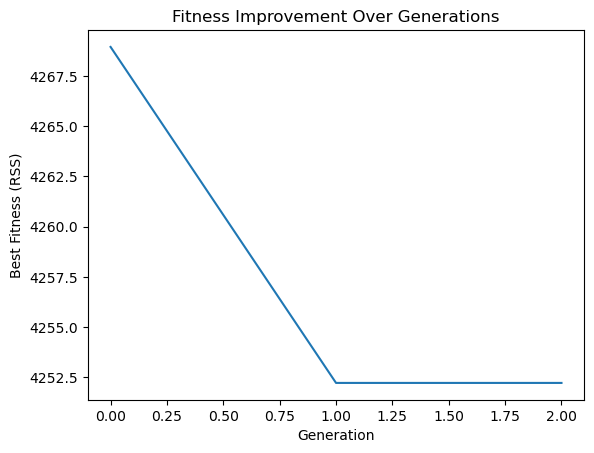

In [1]:
import numpy as np
import pandas as pd

# Step 1: Load the Auto MPG dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')

# Step 2: Data Preprocessing
# Drop rows with missing horsepower values
data = data.dropna(subset=['horsepower'])

# Drop 'car_name' as it's not a numerical feature
data = data.drop(columns=['car_name'])

# Convert 'horsepower' to numeric (it's loaded as string due to '?')
data['horsepower'] = pd.to_numeric(data['horsepower'])

# Separate the target variable (mpg) and features
X = data.drop(columns=['mpg'])
y = data['mpg'].values

# Step 3: Normalize the Features
X = (X - X.mean()) / X.std()

# Step 4: Genetic Algorithm Components

# Step 4.1: Initialize Population
def initialize_population(pop_size, num_features):
    # Each individual is a binary array representing feature selection
    # 1 means the feature is selected, 0 means it is not
    return np.random.randint(2, size=(pop_size, num_features))

# Step 4.2: Fitness Function (Evaluate RSS of the selected features)
def fitness_function(individual, X, y):
    # Select only the features chosen by the individual
    selected_features = np.where(individual == 1)[0]
    if len(selected_features) == 0:
        return float('inf')  # Return a high value if no features are selected
    
    X_selected = X[:, selected_features]
    
    # Adding bias term for linear regression
    X_selected = np.c_[np.ones(X_selected.shape[0]), X_selected]
    
    # Compute theta using normal equation (linear regression)
    theta = np.linalg.inv(X_selected.T @ X_selected) @ X_selected.T @ y
    
    # Compute predictions and RSS
    predictions = X_selected @ theta
    rss = np.sum((y - predictions) ** 2)
    
    return rss

# Step 4.3: Selection (Tournament Selection)
def tournament_selection(population, fitness_scores, tournament_size=3):
    # Select a subset of individuals and return the best one
    selected_indices = np.random.choice(len(population), size=tournament_size, replace=False)
    best_individual = population[selected_indices[0]]
    best_fitness = fitness_scores[selected_indices[0]]
    
    for idx in selected_indices[1:]:
        if fitness_scores[idx] < best_fitness:
            best_individual = population[idx]
            best_fitness = fitness_scores[idx]
    
    return best_individual

# Step 4.4: Crossover (Single-point Crossover)
def crossover(parent1, parent2):
    point = np.random.randint(1, len(parent1) - 1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    
    return child1, child2

# Step 4.5: Mutation (Bit-flip Mutation)
def mutate(individual, mutation_rate=0.01):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]  # Flip the bit
    return individual

# Step 4.6: Genetic Algorithm for Feature Selection
def genetic_algorithm(X, y, pop_size=20, num_generations=100, mutation_rate=0.01):
    num_features = X.shape[1]
    
    # Initialize population
    population = initialize_population(pop_size, num_features)
    
    # Record fitness history for analysis
    fitness_history = []
    
    for generation in range(num_generations):
        # Step 1: Evaluate fitness of the population
        fitness_scores = np.array([fitness_function(individual, X, y) for individual in population])
        
        # Store the best fitness for this generation
        fitness_history.append(np.min(fitness_scores))
        
        # Step 2: Selection (Create a new population)
        new_population = []
        for _ in range(pop_size // 2):
            # Select two parents using tournament selection
            parent1 = tournament_selection(population, fitness_scores)
            parent2 = tournament_selection(population, fitness_scores)
            
            # Crossover to produce two children
            child1, child2 = crossover(parent1, parent2)
            
            # Mutate the children
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            
            # Add children to the new population
            new_population.append(child1)
            new_population.append(child2)
        
        population = np.array(new_population)
        
        # Step 3: Track and print the best solution
        best_fitness = np.min(fitness_scores)
        best_individual = population[np.argmin(fitness_scores)]
        print(f"Generation {generation}: Best Fitness = {best_fitness:.4f}")
        
        # Early stopping if convergence detected
        if generation > 0 and abs(fitness_history[-2] - fitness_history[-1]) < 1e-6:
            print(f"Converged after {generation} generations.")
            break
    
    return best_individual, fitness_history

# Step 5: Run Genetic Algorithm on Auto MPG dataset
# Convert DataFrame to NumPy for feature selection
X_values = X.values

# Run the genetic algorithm
best_individual, fitness_history = genetic_algorithm(X_values, y, pop_size=50, num_generations=100, mutation_rate=0.01)

# Step 6: Output the Results
selected_features = np.where(best_individual == 1)[0]
print(f"Selected features: {selected_features}")

# Feature names
feature_names = X.columns
selected_feature_names = feature_names[selected_features]
print(f"Selected feature names: {selected_feature_names}")

# Step 7: Plot Fitness History (Optional)
import matplotlib.pyplot as plt

plt.plot(fitness_history)
plt.xlabel('Generation')
plt.ylabel('Best Fitness (RSS)')
plt.title('Fitness Improvement Over Generations')
plt.show()
